In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod
import numpy as np


In [2]:
class Tree:
    
    def __init__(self, root):
        self.root = root
        self.labels = []
        root.setTree(self)
        self.generate(root)

        self.pos = None
        self.edges =  None
        self.colors = None
        self.weights = None
        self.node_colors = []

    @abstractmethod
    def generate(self, node):
        pass
    
    def addLabel(self, label: int):
        self.labels.append(label)

class Node:
    TEAL = "#e6f2f2"
    GOLD = "#fcc200"
    PURPLE = "#f9e6ec"
    RED = "#FF0000"

    colors = [TEAL, GOLD, PURPLE, RED]
    
    columns = []

    def __init__(self, label):
        self.tree = None
        self.predecessor = None
        self.successors = [] 
        self.label = label
        #self.col = 0
        self.row = 0

    def addSuccessor(self, successor):
        successor.row = self.row + 1
        if self.tree is not None and not successor.label in self.tree.labels:
            successor.setTree(self.tree)
            successor.predecessor = self
            self.successors.append(successor)
    
    def setTree(self, tree: Tree):
        self.tree = tree
        self.tree.addLabel(self.label)
        self.tree.genColCluster()

    def getType(label):
        if (label + 1) % 3 == 0:
            if ((label-1)/4)%2 == 0:
                return 4
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1

In [3]:
def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def fG(num):
    return 2*num-1

def getType(num):
    if (num+1) %3 == 0:
        return "A"
    elif (num%3) == 0:
        return "B"
    elif (num-1)%3 == 0:
        return "C"

def ruleTwo(num):
        result = (num-1)/2
        r = 0
        k = 0

        while result % 2 != 0:
            result = (result-1)/2
            k+=1

        r = result/2

        if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
            return (True)
        else:
            return (False)

def isIncluded(arr, num):
    for i in arr:
        if i == num:
            return True
        
    return False


In [4]:
#Aberkane Tree
class AberkaneTree(Tree):
    def __init__(self, root: Node, height: int):
        self.height = height
        self.columns = []
        self.predecessor_con = []
        self.successor_con = []
        self.connection_id = 0
        self.movement_con = []
        super().__init__(root)   

    def generate(self, node: Node):
        mid_in_range = True
        left_in_range = True
        right_in_range = True

        label = node.label
        h = self.height - 1
        b_leaf = 1
        for i in range(1,h+1):
            b_leaf = int(b_leaf * 2 + 1) 

        if (node.label * 4 + 1) > (b_leaf):
            mid_in_range = False
        else:
            mid_in_range = True

        if (node.label * 2 + 1) > (b_leaf):
            right_in_range = False
        else:
            right_in_range = True

        if (node.label * 2 - 1) > (b_leaf):
            left_in_range = False
        else:
            left_in_range = True

        if node.label == 1:         
            right_child =  Node(node.label * 2 + 1)      
            node.addSuccessor(right_child)          
            self.generate(right_child)      
            self.predecessor_con.append(1)
            self.successor_con.append(3) 
            self.predecessor_con.append(1)
            self.successor_con.append(5) 
            self.connection_id = self.connection_id + 2
        else:          
            if mid_in_range == True:
                middle_child = Node(node.label * 4 + 1)          
            if right_in_range == True:
                right_child = Node(node.label * 2 + 1)
            if left_in_range == True:
                left_child = Node(node.label * 2 - 1)

            if right_in_range == True:
                node.addSuccessor(right_child)
            if mid_in_range == True:
                node.addSuccessor(middle_child)
            if left_in_range == True:
                node.addSuccessor(left_child)

            if right_in_range == True:
                self.generate(right_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(right_child.label)
                self.connection_id = self.connection_id + 1
            if mid_in_range == True:
                self.generate(middle_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(middle_child.label)
                self.connection_id = self.connection_id + 1
            if left_in_range == True:
                self.generate(left_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(left_child.label)
                self.connection_id = self.connection_id + 1
        
    def genColCluster(self):       
        aberkane_height = self.height-1
        col_arr = []
        big_leaf = int(1)
        used_nodes = []
        col_position = 0
        is_right = False
        is_left = False
        right_node = 0
        left_node = 0
        movement_con = []

        for i in range(1,aberkane_height+1):
            big_leaf = int(big_leaf * 2 + 1) 

        for j in range(1,big_leaf+1, 2):
            is_part = False
            col_build = []

            for x in used_nodes:
                if j == x:
                    is_part = True
            
            if is_part == False:
                used_nodes.append(int(j))
                col_build.append(int(j))

                right_node = int((j-1)/2)
                left_node = int((j+1)/2)
                    
                is_right = False
                is_left = False

                for a in used_nodes:      
                    if j == 1:
                        is_right = True
                        is_left = True
                    elif a == int(right_node):
                        is_right = True
                    elif a == int(left_node):
                        is_left = True
                            
                test_node = j*4+1
                while(test_node < big_leaf):
                    test_node_is_part = False
                    for y in used_nodes:
                        if test_node == y:
                            test_node_is_part = True
                            test_node = big_leaf+1
                    if test_node_is_part == False:
                        col_build.append(int(test_node))
                        used_nodes.append(int(test_node))
                        test_node = test_node * 4 + 1

                col_position
                len_col_i = 0
                len_columns = len(col_arr)

                for i in range(0,len_columns):
                    len_col_i = len(col_arr[i])
                    for j in range(0, len_col_i):
                        if col_arr[i][j] == left_node or col_arr[i][j] == right_node:
                            col_position = i 

                if is_left == True and is_right == True:
                    col_arr.append(col_build)
                    movement_con.append(left_node)
                elif is_left == True:
                    if col_position == 0:
                        col_arr.insert(col_position, col_build)
                    else:
                        col_arr.insert(col_position, col_build)
                    
                    movement_con.append(col_build[0])

                elif is_right == True:
                    col_arr.insert(col_position+1, col_build)
                    
        self.movement_con = movement_con
        self.columns = col_arr
        return
    

    def genGraphData(self, G):              
        
        big_leaf = 2**(self.height)-1

        for i in range(3,2**(self.height),2):
            
            if(i*4+1 <= big_leaf):
                G.add_edge((i),(i*4+1), color='white',weight=1)
            if(i*2+1 <= big_leaf):
                G.add_edge((i),(i*2+1), color='white',weight=1)   
            if(i*2-1 <= big_leaf):
                G.add_edge((i),(i*2-1), color='white',weight=1)  

        G.add_edge((1),5, color='yellow',weight=5) #black before
        G.add_edge((1),3, color='yellow',weight=5) #black before
        
        used = []
        proven = []

        rTwoCon = []
        rTwoCon.append(1)
        rTwoCon.append(3)

        proven.append(3)
        proven.append(5)
        
        while len(proven) > 0:
            proven.sort()
            #print(proven)
            for i in proven:

            #i = proven[0]
                if isIncluded(used, i) == False:
                    used.append(i)
                    # RULE 1 : if x is orange V(x) becomes orange 
                    if V(i) <= big_leaf + 1 and isIncluded(used, V(i)) == False:
                        proven.append(V(i))
                        
                        if V(i) == 17:
                            G.add_edge(1, 17, color='yellow',weight=5)
                        else:
                            G.add_edge(i,V(i),color='yellow',weight=5) #black before


                    # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
                    r2 = ruleTwo(i)
                    if r2: 
                        if S(i) <= big_leaf + 1 and isIncluded(used, S(i)) == False:
                            proven.append(S(i))
                            if S(i) == 17:
                                G.add_edge(1, 17, color='yellow',weight=5)   
                            else:
                                #G.add_edge(i,S(i),color='black',weight=5)
                                rTwoCon.append(i)
                                rTwoCon.append(S(i)) 

                    if Node.getType(i) == 2:
                        proven.remove(i)
                        break 
                            

                    # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
                    if Node.getType(i) == 3:
                        
                        value3 = int((4*i-1)/3)

                        if value3 <= big_leaf + 1 and isIncluded(used, value3) == False:
                            proven.append(value3)
                            
                            if value3 == 17:
                                G.add_edge(1, 17, color='yellow',weight=5)
                            
                            elif int((value3-1)/2) %2 != 0:
                                G.add_edge( int((value3-1)/2), value3, color='yellow',weight=5)

                            elif int((value3+1)/2) %2 != 0:
                                G.add_edge( int((value3+1)/2), value3, color='yellow',weight=5)

                            elif int((value3-1)/4) %2 != 0:
                                G.add_edge( int((value3-1)/4), value3, color='yellow',weight=5)
                            
                        proven.remove(i)
                        break 

                    # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
                    if Node.getType(i) == 1 or Node.getType(i) == 4:                       
                        value4 = int(fG(i)/3)                       
                        
                        #print(value4)
                        if isIncluded(used, value4) == False: 
                            proven.append(value4)   
                            if value4 == 17:
                                G.add_edge(1, 17, color='yellow',weight=5)
                            elif value4 == 19:
                                G.add_edge(9, 19, color='yellow',weight=5) #black before
                                #print(i)
                                #print(value4)
                            elif ((value4-1)/2) % 2 != 0:
                                G.add_edge((fG(i)/3), ((value4-1)/2), color='yellow',weight=5)

                            elif ((value4-1)/4) % 2 != 0:
                                G.add_edge(value4, ((value4-1)/2), color='yellow',weight=5)

                            elif ((value4+1)/2) % 2 != 0:
                                G.add_edge(value4, ((value4-1)/2) ,color='yellow',weight=5)
                        proven.remove(i)
                        break        
                    #print(i)
                    proven.remove(i)
                else:
                    proven.remove(i)
        
        print(rTwoCon)

        for con in range(0,len(rTwoCon)-1,2):
            G.add_edge(rTwoCon[con], rTwoCon[con+1],color='yellow',weight=5) #black before

        for node in G:
            color_type = Node.getType(node)
            self.node_colors.append(Node.colors[color_type-1])
        self.edges = G.edges()
        self.colors = [G[u][v]['color'] for u,v in self.edges]
        self.weights = [G[u][v]['weight'] for u,v in self.edges]

    def generatePos(self, label_value):
        col_counter = 0
        len_col_i = 0
        len_columns = len(self.columns)
        col = 0.0
        row = 0.0
        for i in range(0,len_columns):
            len_col_i = len(self.columns[i])
            for j in range(0, len_col_i):             
                if self.columns[i][j] == int(label_value):
                    col = float(i+1)
                    break
        if label_value == 1:
            row = -2*float(1) * 0.2
        elif label_value == 3:
            row = -1.5*float(2) * 0.2  
        else:
            for i in range(2,int(label_value)):
                if label_value > (2**(i-1)) and label_value < (2**i):
                    row = -1*float(i+1) * 0.2
                    break
        return (col, row)

    def generatePosArr(self):
        pos1 = {}
        len_col_i = 0
        len_columns = len(self.columns)
        for i in range(0,len_columns):
            len_col_i = len(self.columns[i])
            for j in range(0, len_col_i):
                pos1[self.columns[i][j]] = self.generatePos(self.columns[i][j])
        self.pos = pos1
        return


[1, 3, 11, 23, 7, 15, 9, 19]


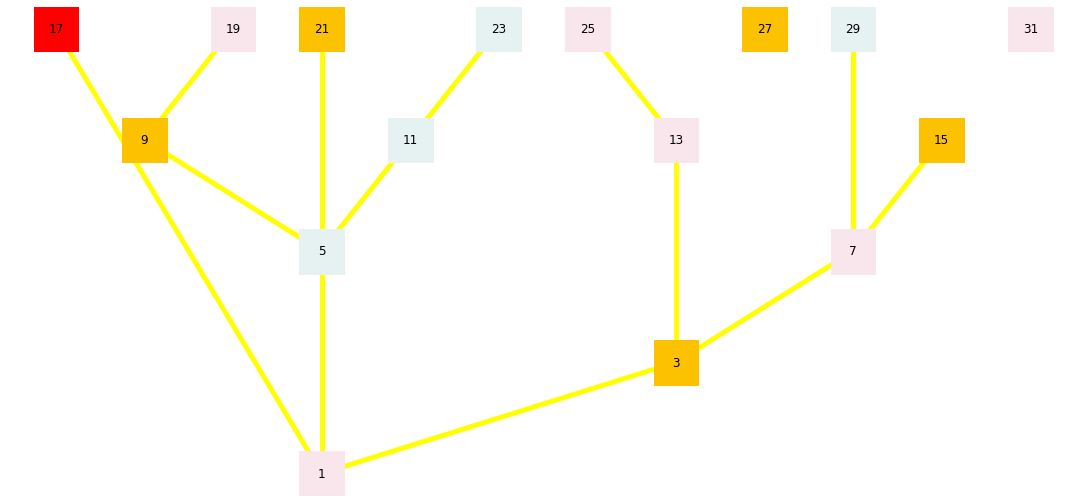

In [5]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 5) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 5
for i in range(1,(aberkane_tree.height)):
    w = w * 1.4
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

[1, 3, 17, 35, 11, 23, 7, 15, 9, 19, 25, 51]


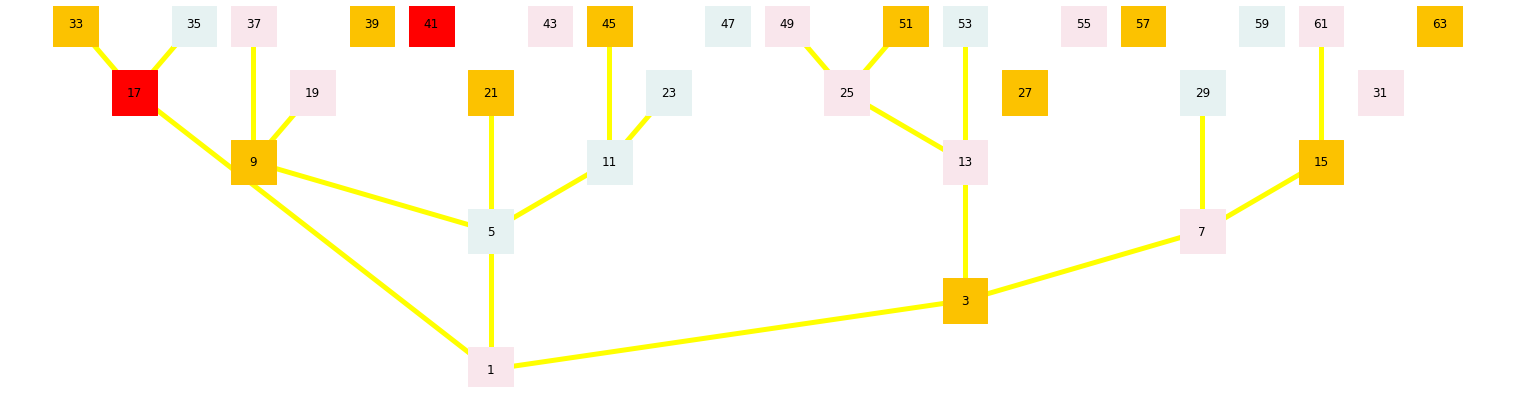

In [6]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 6) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.4
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

[1, 3, 17, 35, 11, 23, 7, 15, 9, 19, 25, 51, 33, 67, 49, 99, 43, 87, 57, 115, 59, 119, 39, 79]


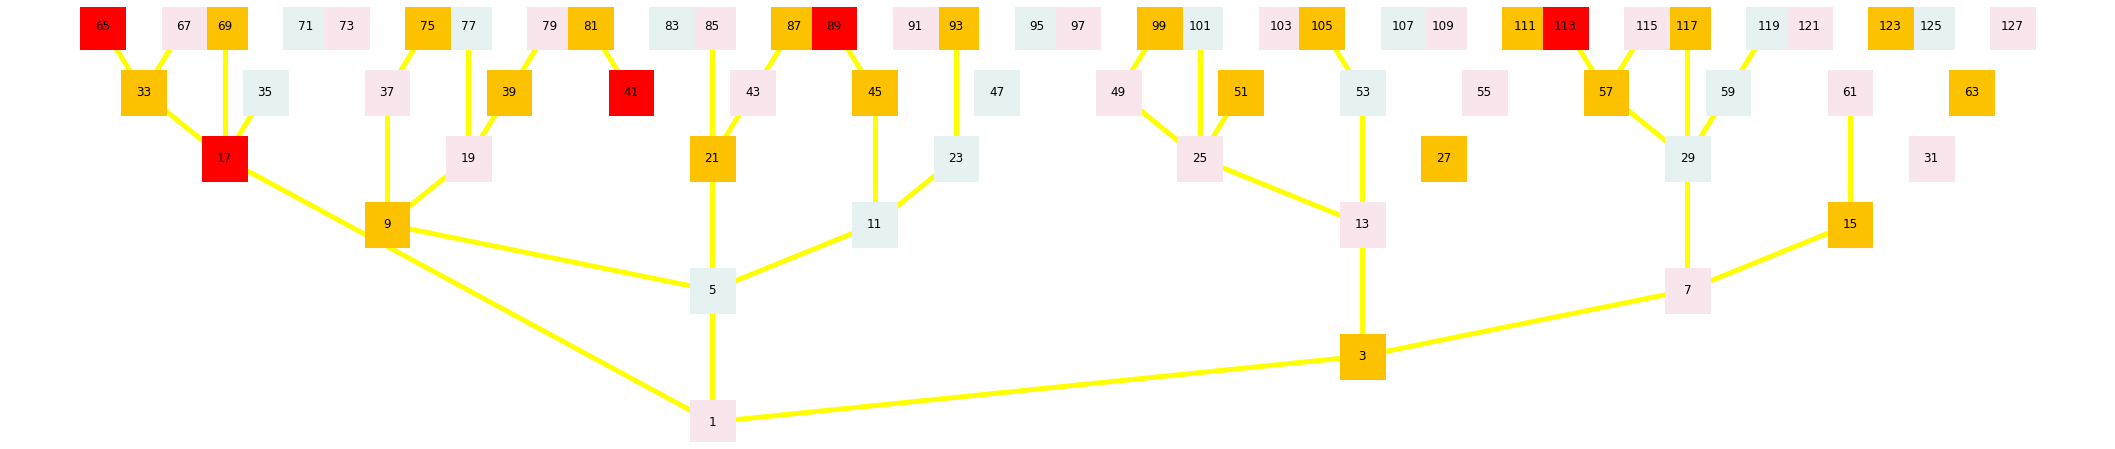

In [7]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 7) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.4
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

[1, 3, 17, 35, 11, 23, 7, 15, 9, 19, 25, 51, 33, 67, 49, 99, 65, 131, 43, 87, 57, 115, 81, 163, 89, 179, 59, 119, 39, 79, 105, 211, 113, 227, 75, 151, 123, 247]


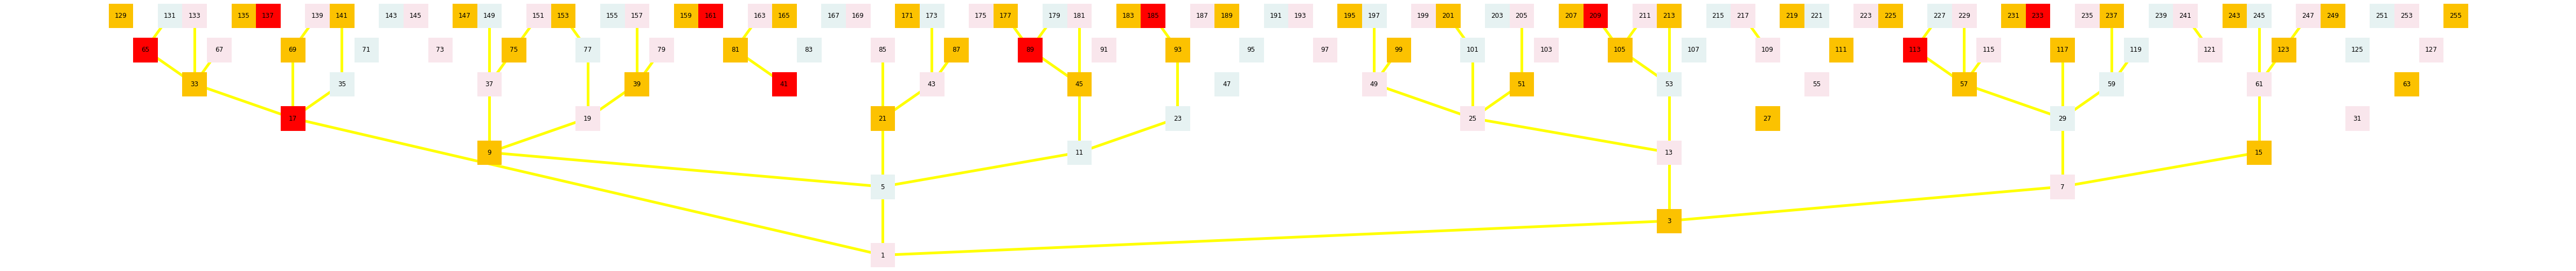

In [8]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 8) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.5
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

[1, 3, 17, 35, 11, 23, 7, 15, 9, 19, 25, 51, 33, 67, 49, 99, 65, 131, 43, 87, 57, 115, 81, 163, 89, 179, 59, 119, 39, 79, 105, 211, 113, 227, 75, 151, 153, 307, 177, 355, 201, 403, 209, 419, 139, 279, 185, 371, 123, 247, 217, 435, 241, 483, 273, 547, 281, 563, 187, 375, 249, 499, 289, 579, 305, 611, 203, 407, 135, 271, 321, 643, 329, 659, 219, 439, 361, 723, 369, 739, 385, 771, 401, 803, 267, 535, 409, 819, 433, 867, 465, 931, 473, 947, 315, 631, 481, 963, 497, 995, 331, 663, 441, 883, 363, 727, 427, 855, 379, 759, 505, 1011, 443, 887, 295, 591, 393, 787, 475, 951, 507, 1015]


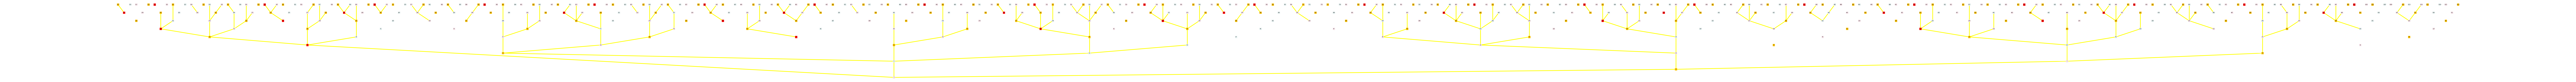

In [9]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 10)
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.6
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights, font_size = 8, node_color=aberkane_tree.node_colors,node_shape = "s", node_size=250, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

[1, 3, 17, 35, 11, 23, 7, 15, 9, 19, 25, 51, 33, 67, 49, 99, 65, 131, 43, 87, 57, 115, 81, 163, 89, 179, 59, 119, 39, 79, 105, 211, 113, 227, 75, 151, 153, 307, 177, 355, 201, 403, 209, 419, 139, 279, 185, 371, 123, 247, 217, 435, 241, 483, 273, 547, 281, 563, 187, 375, 249, 499, 289, 579, 305, 611, 203, 407, 135, 271, 321, 643, 329, 659, 219, 439, 361, 723, 369, 739, 385, 771, 401, 803, 267, 535, 409, 819, 433, 867, 465, 931, 473, 947, 315, 631, 481, 963, 497, 995, 331, 663, 441, 883, 513, 1027, 529, 1059, 537, 1075, 545, 1091, 363, 727, 561, 1123, 577, 1155, 585, 1171, 625, 1251, 641, 1283, 427, 855, 569, 1139, 379, 759, 505, 1011, 657, 1315, 665, 1331, 443, 887, 295, 591, 393, 787, 673, 1347, 705, 1411, 713, 1427, 475, 951, 633, 1267, 721, 1443, 729, 1459, 753, 1507, 769, 1539, 817, 1635, 833, 1667, 555, 1111, 841, 1683, 857, 1715, 571, 1143, 761, 1523, 507, 1015, 897, 1795, 945, 1891, 961, 1923, 969, 1939, 985, 1971, 1025, 2051, 683, 1367, 455, 911, 303, 607, 809, 1619, 539, 1079, 

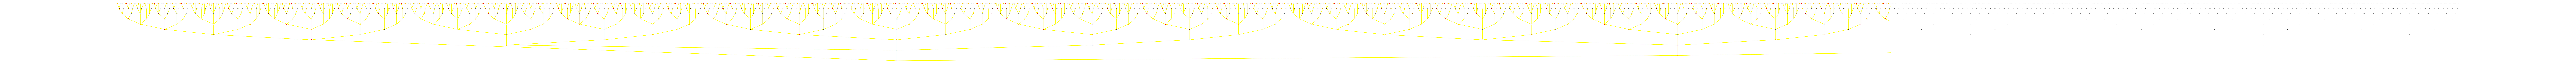

In [10]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 12)
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 800
h = 20
#for i in range(1,(aberkane_tree.height)):
#    w = w * 1.6
#    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights, font_size = 8, node_color=aberkane_tree.node_colors,node_shape = "s", node_size=250, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

In [19]:

# n=5

# big_leaf = (2**n)-1

# used = []
# proven = []

# proven.append(3)
# proven.append(5)

# arrInfo = []
# rowStartLabel = []

# for i in range(0,n):
#     if i == 0:
#         arrInfo.append(1)
#         rowStartLabel.append(1)
#     elif i == 1:
#         arrInfo.append(1)
#         rowStartLabel.append(3)
#     else:
#         arrInfo.append(2**(i-1))
#         rowStartLabel.append(2**i + 1)

# print(rowStartLabel)
# print(arrInfo)

# counter = 0

# while len(proven) > 0:
#     proven.sort()
#     #print(proven)
#     for i in proven:
        
#         if isIncluded(used, i) == False:
#             used.append(i)
#             # RULE 1 : if x is orange V(x) becomes orange 
#             if V(i) <= big_leaf + 1:
#                 proven.append(V(i))
                
#                 value1 = V(i)
#                 counter = 0
                
#                 for i in rowStartLabel:
#                     if value1 < rowStartLabel[counter]:
#                         break
#                     else:
#                         counter = counter + 1
                
#                 # while value1 < rowStartLabel[counter-1]:
#                 #     counter += 1
#                 #     if counter == len(rowStartLabel)-1:
#                 #         break
                
#                 arrInfo[counter-1] -= 1

#                 if arrInfo[counter-1] == 0:
#                     print("{0}: {1}".format(counter, len(proven)))


#             # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
#             r2 = ruleTwo(i)
#             if r2: 
#                 if S(i) <= big_leaf + 1:
#                     proven.append(S(i))

#                 value2 = S(i)
#                 counter = 0
#                 while value2 < rowStartLabel[counter]:
#                     counter += 1
#                     if counter == len(rowStartLabel)-1:
#                         break
                    
#                 arrInfo[counter-1] -= 1

#             if arrInfo[counter-1] == 0:
#                 print("{0}: {1}".format(counter, len(proven)))

#             # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
#             if Node.getType(i) == 3:
                
#                 value3 = int((4*i-1)/3)
#                 counter = 0
#                 if value3 <= big_leaf + 1:
#                     proven.append(value3)
                    
#                 while value3 < rowStartLabel[counter]:
#                     counter += 1
#                     if counter == len(rowStartLabel)-1:
#                         break
                    
                    
#                 arrInfo[counter-1] -= 1

#                 if arrInfo[counter-1] == 0:
#                     print("{0}: {1}".format(counter, len(proven)))


#             # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
#             if Node.getType(i) == 1 or Node.getType(i) == 4:                       
#                 value4 = int(fG(i)/3)                       
#                 proven.append(value4)
#                 #print(value4)
#                 counter = 0
#                 while value4 < rowStartLabel[counter]:
#                     counter += 1
#                     if counter == len(rowStartLabel)-1:
#                         break
                
#                 arrInfo[counter-1] -= 1

#                 if arrInfo[counter-1] == 0:
#                     print("{0}: {1}".format(counter, len(proven)))

#                 break        
#             #print(i)
#             proven.remove(i)
#             #proven.sort()
#             break
#         else:
#             proven.remove(i)

KeyboardInterrupt: 

In [6]:
def ruleTwo(num):
        result = (num-1)/2
        r = 0
        k = 0

        while result % 2 != 0:
            result = (result-1)/2
            k+=1

        r = result/2

        if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
            return (True)
        else:
            return (False)

print(ruleTwo(19))

False
